# Problem Statement

You are opening a new Store at a particular location. Now, Given the Store Location, Area, Size and other params. Predict the overall revenue/Sale generation of the Store.

# Dataset Description

Dataset Details: The data has 8523 rows of 12 variables.

Columns:

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. [This is the outcome variable to be predicted.]

# Loading Packages and the Datasets 

• We will work with Train dataset first

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Train Dataset Description

In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
train.shape

(8523, 12)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
Train_Null_Percentage = (train.isnull().sum()/train.shape[0])*100
Train_Null_Percentage

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

• We can see in Train Dataset, Item_Weight and Item_Size columns contains 17% and 28% null values.

# Null Value Treatment [Train]

• Replacing Item_Weight null values with mean [12.857645184135976] because it is Numerical column.

In [11]:
train["Item_Weight"].fillna(value = train["Item_Weight"].mean(), inplace = True)

• Replacing Item_Weight null values with mode [Medium] because its is Categorical column.

In [12]:
train["Outlet_Size"].fillna(value = train["Outlet_Size"].mode()[0], inplace = True)

In [13]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
print(train["Item_Fat_Content"].value_counts())

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


We Need to repalce 'LF' and 'low fat' with 'Low Fat' and 'reg' with 'Regular'.

In [15]:
train = train.replace({'Item_Fat_Content' : { 'LF' : 'Low Fat', 'reg' : 'Regular', 'low fat' : 'Low Fat' }})
print(train["Item_Fat_Content"].value_counts())

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


In [16]:
print(train["Item_Type"].value_counts())

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


In [17]:
print(train["Outlet_Location_Type"].value_counts())

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64


In [18]:
print(train["Outlet_Type"].value_counts())

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64


• We will replace 'Grocery Store' with 'Supermarket Type4'

In [19]:
train = train.replace({'Outlet_Type' : { 'Grocery Store' : 'Supermarket Type4'}})
print(train["Outlet_Type"].value_counts())

Outlet_Type
Supermarket Type1    5577
Supermarket Type4    1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64


• Now We will work with Test Dataset

In [20]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Test Dataset Description

In [21]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [22]:
test.shape

(5681, 11)

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [24]:
Test_Null_Percentage = (test.isnull().sum()/train.shape[0])*100
Test_Null_Percentage

Item_Identifier               0.000000
Item_Weight                  11.451367
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  18.843130
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

• We can see in Test Dataset also Item_Weight and Item_Size columns contains 11% and 18% null values.

# Null Value Treatment [Test]

• Replacing Item_Weight null values with mean [12.695633368756642] because it is Numerical column.

In [25]:
test["Item_Weight"].fillna(value = test["Item_Weight"].mean(), inplace = True)

• Replacing Item_Weight null values with mode [Medium] because its is Categorical column.

In [26]:
test["Outlet_Size"].fillna(value = test["Outlet_Size"].mode()[0], inplace = True)

In [27]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [28]:
print(test["Item_Fat_Content"].value_counts())

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64


In [29]:
test = test.replace({'Item_Fat_Content' : { 'LF' : 'Low Fat', 'reg' : 'Regular', 'low fat' : 'Low Fat' }})
print(test["Item_Fat_Content"].value_counts())

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64


In [30]:
print(test["Item_Type"].value_counts())

Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: count, dtype: int64


In [31]:
print(test["Outlet_Location_Type"].value_counts())

Outlet_Location_Type
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: count, dtype: int64


In [32]:
print(test["Outlet_Type"].value_counts())

Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: count, dtype: int64


In [33]:
test = test.replace({'Outlet_Type' : { 'Grocery Store' : 'Supermarket Type4'}})
print(test["Outlet_Type"].value_counts())

Outlet_Type
Supermarket Type1    3717
Supermarket Type4     722
Supermarket Type3     624
Supermarket Type2     618
Name: count, dtype: int64


# Dropping Few Columns

• Dropping 'Item_Identifier' and 'Outlet_Identifier' from both Train and Test datasets

In [34]:
train_data = train.drop(['Item_Identifier','Outlet_Identifier'], axis=1)

In [35]:
test_data = test.drop(['Item_Identifier','Outlet_Identifier'], axis=1)

In [36]:
train_data.shape

(8523, 10)

In [37]:
test_data.shape

(5681, 9)

# Data Visualization (For Outliers and Insights)

• For Numerical Variables, Boxplot.

• Categorical Variables: Barplot and Countplots.

<Axes: xlabel='Item_Weight'>

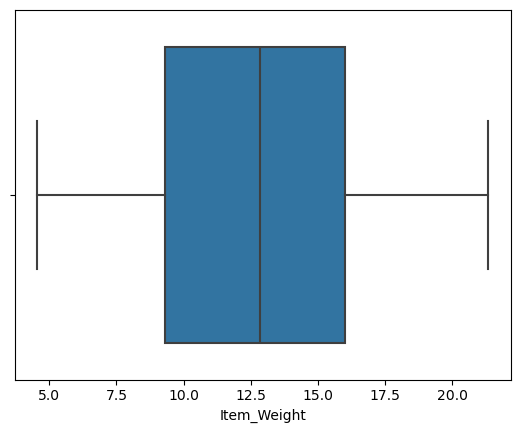

In [38]:
sns.boxplot(x = train_data["Item_Weight"])

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

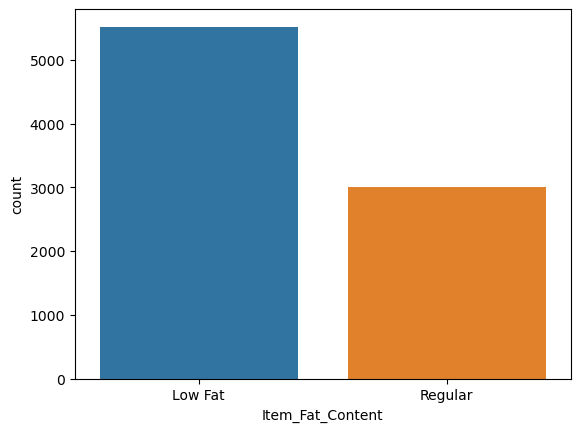

In [39]:
sns.countplot(x = train_data["Item_Fat_Content"], data = train_data)

<Axes: xlabel='Item_Visibility'>

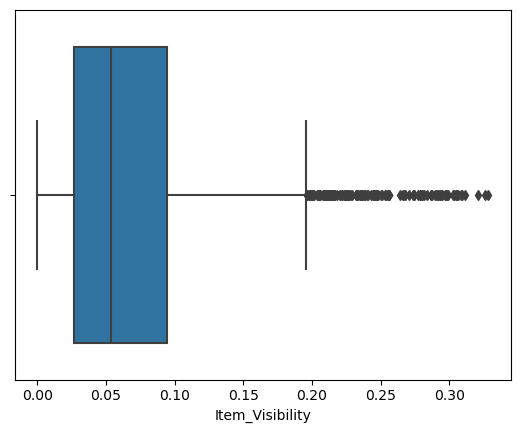

In [40]:
sns.boxplot(x = train_data["Item_Visibility"])

In [41]:
Q1 = train_data.Item_Visibility.quantile(0.25)
Q3 = train_data.Item_Visibility.quantile(0.75)
IQR = Q3 - Q1
Lower_Limit = Q1 - (1.5*IQR)
Upper_Limit = Q3 + (1.5*IQR)
train_data_no_outlier = train_data[(train_data.Item_Visibility>Lower_Limit)&(train_data.Item_Visibility<Upper_Limit)]

<Axes: xlabel='Item_Visibility'>

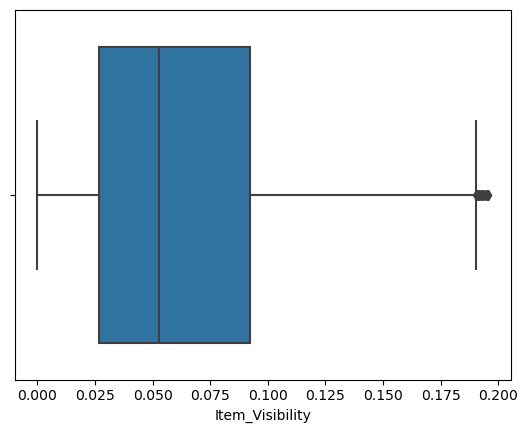

In [42]:
sns.boxplot(x = train_data_no_outlier["Item_Visibility"])

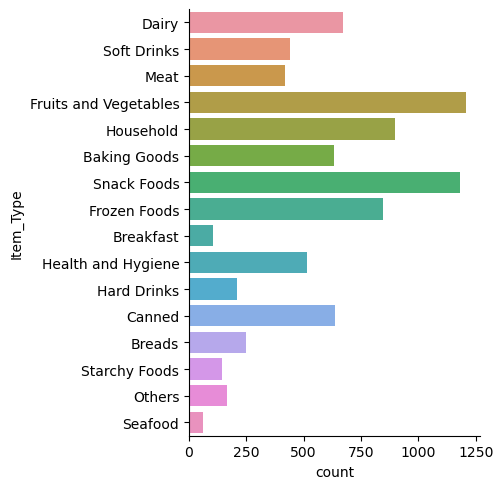

In [43]:
sns.catplot(data = train_data_no_outlier, y = "Item_Type", kind="count")

<Axes: xlabel='Item_MRP'>

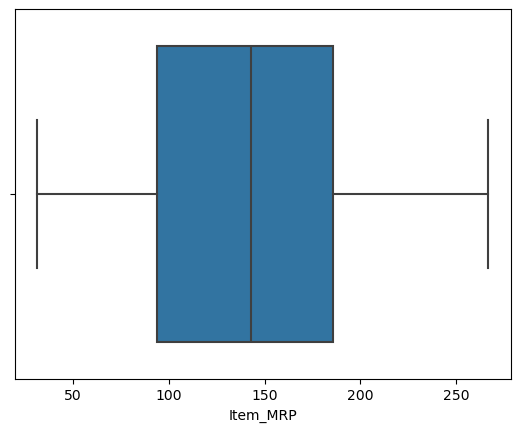

In [44]:
sns.boxplot(x = train_data_no_outlier["Item_MRP"])

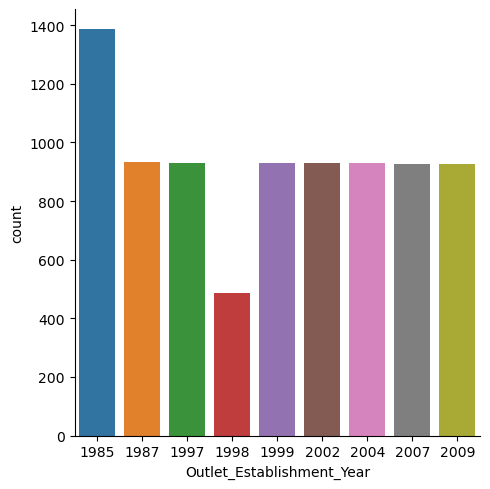

In [45]:
sns.catplot(data = train_data_no_outlier, x = "Outlet_Establishment_Year", kind="count")

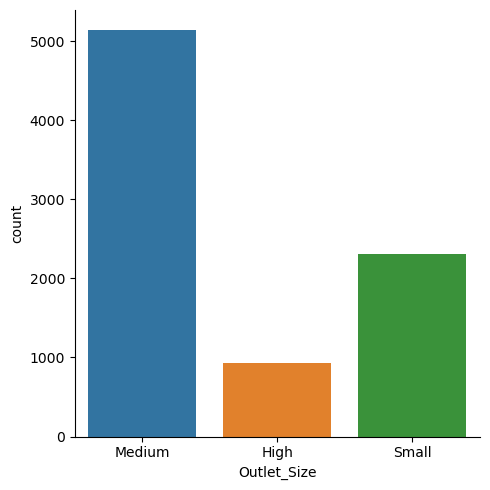

In [46]:
sns.catplot(data = train_data_no_outlier, x = "Outlet_Size", kind="count")

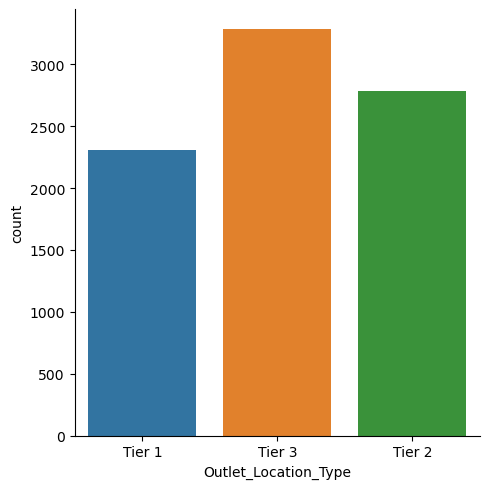

In [47]:
sns.catplot(data = train_data_no_outlier, x = "Outlet_Location_Type", kind="count")

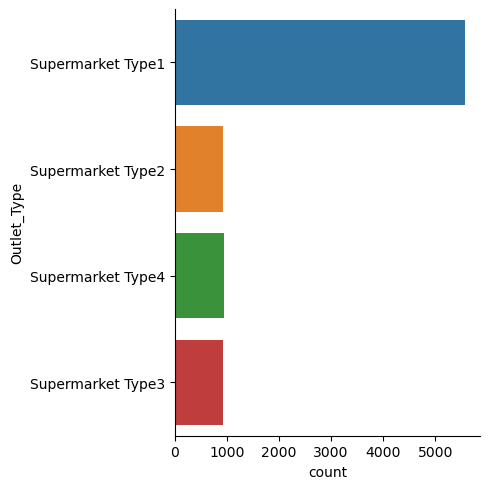

In [48]:
sns.catplot(data = train_data_no_outlier, y = "Outlet_Type", kind="count")

<Axes: xlabel='Item_Outlet_Sales'>

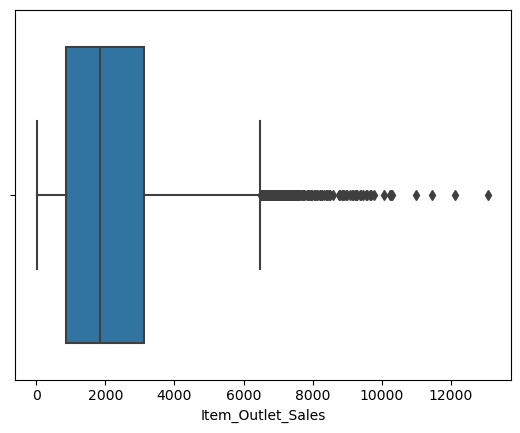

In [49]:
sns.boxplot(x = train_data_no_outlier["Item_Outlet_Sales"])

In [50]:
Q1 = train_data_no_outlier.Item_Outlet_Sales.quantile(0.25)
Q3 = train_data_no_outlier.Item_Outlet_Sales.quantile(0.75)
IQR = Q3 - Q1
Lower_Limit = Q1 - (1.5*IQR)
Upper_Limit = Q3 + (1.5*IQR)
train_data_no_outlier_1 = train_data_no_outlier[(train_data_no_outlier.Item_Outlet_Sales>Lower_Limit)&(train_data_no_outlier.Item_Outlet_Sales<Upper_Limit)]

<Axes: xlabel='Item_Outlet_Sales'>

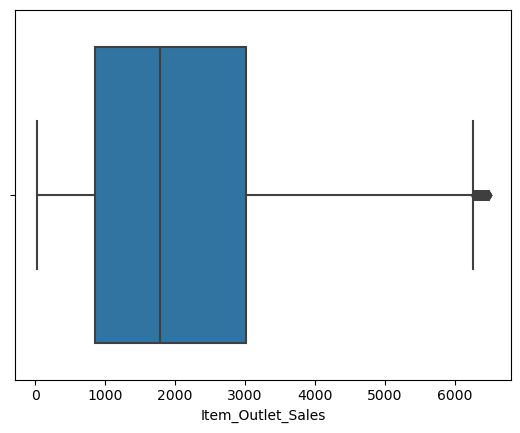

In [51]:
sns.boxplot(x = train_data_no_outlier_1["Item_Outlet_Sales"])

In [52]:
trained_data = train_data_no_outlier_1.copy()
trained_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Supermarket Type4,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [53]:
trained_data.shape

(8193, 10)

In [54]:
trained_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8193 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8193 non-null   float64
 1   Item_Fat_Content           8193 non-null   object 
 2   Item_Visibility            8193 non-null   float64
 3   Item_Type                  8193 non-null   object 
 4   Item_MRP                   8193 non-null   float64
 5   Outlet_Establishment_Year  8193 non-null   int64  
 6   Outlet_Size                8193 non-null   object 
 7   Outlet_Location_Type       8193 non-null   object 
 8   Outlet_Type                8193 non-null   object 
 9   Item_Outlet_Sales          8193 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 704.1+ KB


In [55]:
trained_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000
mean,12.863932,0.063221,139.104030,1998.089711,2089.540121
std,4.266983,0.046285,61.536438,8.286946,1501.498356
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.026818,92.980400,1987.000000,857.550400
50%,12.857645,0.052729,141.147000,1999.000000,1783.678200
75%,16.100000,0.092783,183.663400,2004.000000,3020.068800
max,21.350000,0.195721,266.888400,2009.000000,6478.234000


# Data Profiling

In [56]:
!pip install ydata-profiling

In [57]:
from ydata_profiling import ProfileReport

In [58]:
profile = ProfileReport(trained_data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

• In Test Data the same errors where found in the "Item_Visibility" column.So we will use IQR method to clear outliers.

<Axes: xlabel='Item_Visibility'>

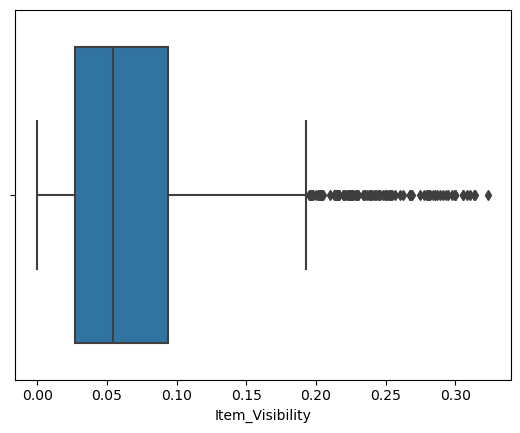

In [64]:
sns.boxplot(x = test_data["Item_Visibility"])

In [67]:
Q1 = test_data.Item_Visibility.quantile(0.25)
Q3 = test_data.Item_Visibility.quantile(0.75)
IQR = Q3 - Q1
Lower_Limit = Q1 - (1.5*IQR)
Upper_Limit = Q3 + (1.5*IQR)
test_data_no_outlier = test_data[(test_data.Item_Visibility>Lower_Limit)&(test_data.Item_Visibility<Upper_Limit)]

<Axes: xlabel='Item_Visibility'>

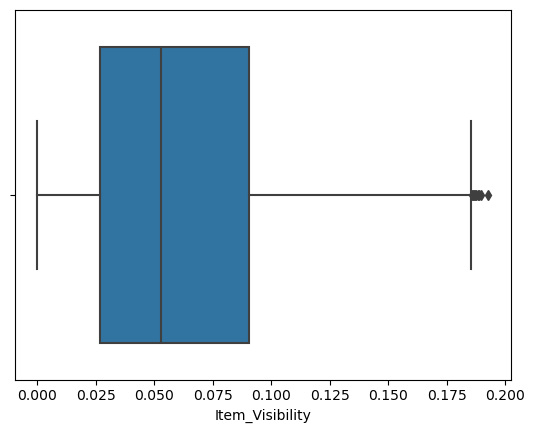

In [70]:
sns.boxplot(x = test_data_no_outlier["Item_Visibility"])

In [76]:
tested_data = test_data_no_outlier.copy()

# Exploratory Data Analysis

• We seperate Categorical and Numerical Columns in cat_cols and num_cols

In [110]:
cat_cols = trained_data.select_dtypes(include=['object']).columns.tolist()
num_cols = trained_data.select_dtypes(include=np.number).columns.tolist()

• We check to Correlation between all the Numerical Columns

In [111]:
trained_data[num_cols].corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.007557,0.026178,-0.009335,0.010881
Item_Visibility,-0.007557,1.000000,0.001426,-0.034039,-0.071907
Item_MRP,0.026178,0.001426,1.000000,0.027364,0.564361
Outlet_Establishment_Year,-0.009335,-0.034039,0.027364,1.000000,-0.009663
Item_Outlet_Sales,0.010881,-0.071907,0.564361,-0.009663,1.000000
